There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

 

Example 1:

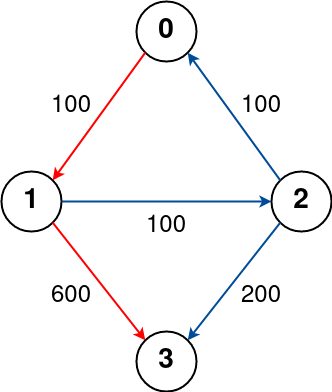

Input: n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1
Output: 700
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.
Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.

Example 2:

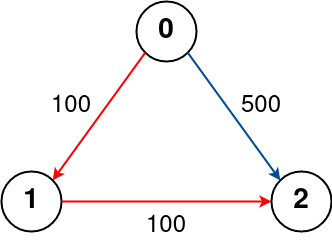

Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 1
Output: 200
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 2 is marked in red and has cost 100 + 100 = 200.

Example 3:

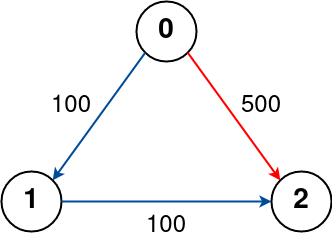

Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 0
Output: 500
Explanation:
The graph is shown above.
The optimal path with no stops from city 0 to 2 is marked in red and has cost 500.

 

Constraints:

    1 <= n <= 100
    0 <= flights.length <= (n * (n - 1) / 2)
    flights[i].length == 3
    0 <= fromi, toi < n
    fromi != toi
    1 <= pricei <= 104
    There will not be any multiple flights between two cities.
    0 <= src, dst, k < n
    src != dst



In [ ]:
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        graph = defaultdict(list)
        for start, end, cost in flights:
            graph[start].append([end, cost])
        
        q = deque()
        q.append([src, 0, [src]])
        maxlen = k + 2
        best_cost = float("inf")

        while q:
            curr, cost, hist = q.popleft()
            if len(hist) > maxlen:
                continue
            if curr == dst:
                if cost <  best_cost:
                    best_cost = cost
            else:
                for nxt, cst in graph[curr]:
                    if nxt not in hist:
                        hst = hist.copy()
                        hst.append(nxt)
                        q.append([nxt, cost + cst, hst])

        if best_cost == float("inf"):
            best_cost = -1
        return best_cost


In [ ]:
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        adj = [[] for _ in range(n)]
        for flight in flights:
            adj[flight[0]].append((flight[1], flight[2]))
        
        q = [(src, 0)]
        minCost = [float('inf') for _ in range(n)]
        stops = 0
        
        while q and stops <= k:
            size = len(q)
            for i in range(size):
                currNode, cost = q.pop(0)
                for neighbour, price in adj[currNode]:
                    if price + cost >= minCost[neighbour]:
                        continue
                    minCost[neighbour] = price + cost
                    q.append((neighbour, minCost[neighbour]))
            stops += 1
        
        return -1 if minCost[dst] == float('inf') else minCost[dst]